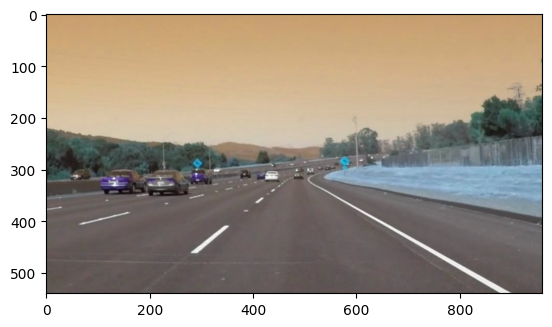

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = r"C:\Users\Ninad\OneDrive\Desktop\projects\road_lane_detection\lane-detection-master\images\solidWhiteCurve.jpg"
image1 = cv2.imread(image_path)
plt.imshow(image1)

In [3]:
def grey(image):
  #convert to grayscale
    image = np.asarray(image)
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  #Apply Gaussian Blur --> Reduce noise and smoothen image
def gauss(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

  #outline the strongest gradients in the image --> this is where lines in the image are
def canny(image):
    edges = cv2.Canny(image,50,150)
    return edges


In [25]:
temp=canny(gauss(grey(image1)))

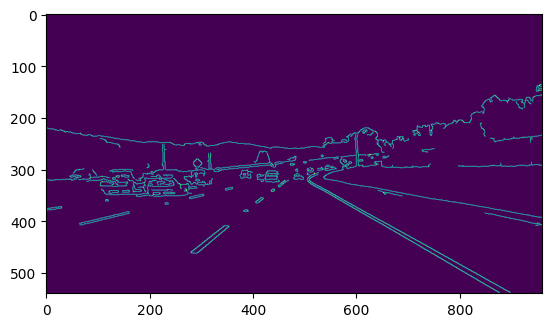

In [26]:
plt.imshow(temp)

In [4]:
def region(image):
    height, width = image.shape
    print(height,width)
    #isolate the gradients that correspond to the lane lines
    triangle = np.array([
                       [(100, height), (475, 325), (width, height)]
                       ])
    #create a black image with the same dimensions as original image
    mask = np.zeros_like(image)
    #create a mask (triangle that isolates the region of interest in our image)
    mask = cv2.fillPoly(mask, triangle, 255)
    
    mask = cv2.bitwise_and(image, mask)
    return mask

540 960


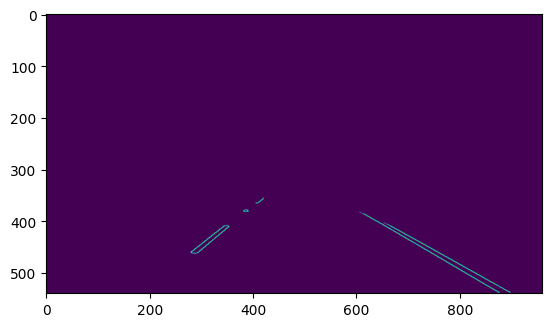

In [28]:
mask=region(temp)
plt.imshow(mask)

In [5]:
def display_lines(image, lines):
    lines_image = np.zeros_like(image)
    #make sure array isn't empty
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line
            #draw lines on a black image
            cv2.line(lines_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return lines_image


In [6]:
def average(image, lines):
    left = []
    right = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        #fit line to points, return slope and y-int
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        y_int = parameters[1]
        #lines on the right have positive slope, and lines on the left have neg slope
        if slope < 0:
            left.append([slope, y_int])
        else:
            right.append([slope, y_int])
    left=np.array(left)
    right=np.array(right)
    

    #takes average among all the columns (column0: slope, column1: y_int)
    right_avg = np.average(right,axis=0)
    left_avg=np.average(left,axis=0)
    #create lines based on averages calculates
    left_line = make_points(image, left_avg)
    right_line = make_points(image, right_avg)
    return np.array([left_line,right_line])
    

In [7]:
def make_points(image, average):
    slope =average[0]
    y_int=average[1]
    y1 = image.shape[0]
    #how long we want our lines to be --> 3/5 the size of the image
    y2 = int(y1 * (3/5))
    #determine algebraically
    x1 = int((y1 - y_int) // slope)
    x2 = int((y2 - y_int) // slope)
    return np.array([x1, y1, x2, y2])

In [32]:
'''##### DETECTING lane lines in image ######'''

copy = np.copy(image1)
edges = cv2.Canny(copy,50,150)
isolated = region(edges)
cv2.imshow("edges", edges)
cv2.imshow("iso", isolated)
cv2.waitKey(0)

540 960


-1

In [33]:
#DRAWING LINES: (order of params) --> region of interest, bin size (P, theta), min intersections needed, placeholder array, 
lines = cv2.HoughLinesP(isolated, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
averaged_lines = average(copy, lines)

black_lines = display_lines(copy, averaged_lines)
#taking wighted sum of original image and lane lines image
lanes = cv2.addWeighted(copy, 0.8, black_lines, 1, 1)
cv2.imshow("lanes", lanes)
cv2.waitKey(0)

-1

In [34]:
'''##### DETECTING lane lines in video ######'''

video = r"C:\Users\Ninad\OneDrive\Desktop\projects\road_lane_detection\lane-detection-master\video\test2_v2_Trim.mp4"
cap = cv2.VideoCapture(video)
print("here")
num = 0
while(cap.isOpened()): 
    ret, frame = cap.read()
    print(num)
    num += 1
    if ret == True:
        gaus = gauss(frame)
        edges = cv2.Canny(gaus,50,150)
        isolated = region(edges)
        #region of interest, bin size (P, theta), min intersections needed, placeholder array, 
        lines = cv2.HoughLinesP(isolated, 2, np.pi/180, 50, np.array([]), minLineLength=40, maxLineGap=5)
        averaged_lines = average(frame, lines)
        black_lines = display_lines(frame, averaged_lines)
        #taking wighted sum of original image and lane lines image
        lanes = cv2.addWeighted(frame, 0.8, black_lines, 1, 1)
        cv2.imshow("frame", lanes)
        if cv2.waitKey(10) & 0xFF == ord('q'): 
            break
    else:
        break
cap.release() 
cv2.destroyAllWindows()  

here
0
720 1280
1
720 1280
2
720 1280
3
720 1280
4
720 1280
5
720 1280
6
720 1280
7
720 1280
8
720 1280
9
720 1280
10
720 1280
11
720 1280
12
720 1280
13
720 1280
14
720 1280
15
720 1280
16
720 1280
17
720 1280
18
720 1280
19
720 1280
20
720 1280
21
720 1280
22
720 1280
23
720 1280
24
720 1280
25
720 1280
26
720 1280
27
720 1280
28
720 1280
29
720 1280
30
720 1280
31
720 1280
32
720 1280
33
720 1280
34
720 1280
35
720 1280
36
720 1280
37
720 1280
38
720 1280
39
720 1280
40
720 1280
41
720 1280
42
720 1280
43
720 1280
44
720 1280
45
720 1280
46
720 1280
47
720 1280
48
720 1280
49
720 1280
50
720 1280
51
720 1280
52
720 1280
53
720 1280
54
720 1280
55
720 1280
56
720 1280
57
720 1280
58
720 1280
59
720 1280
60
720 1280
61
720 1280
62
720 1280
63
720 1280
64
720 1280
65
720 1280
66
720 1280
67
720 1280
68
720 1280
69
720 1280
70
720 1280
71
720 1280
72
720 1280
73
720 1280
74
720 1280
75
720 1280
76
720 1280
77
720 1280
78
720 1280
79
720 1280
80
720 1280
81
720 1280
82
720 1280
83
720 12

In [9]:
'''##### DETECTING EDGES ON FACE ######'''

video = r"C:\Users\Ninad\OneDrive\Desktop\projects\road_lane_detection\lane-detection-master\video\test2_v2_Trim.mp4"
cap = cv2.VideoCapture(0)
print("here")
while(cap.isOpened()): 
    ret, frame = cap.read()
    if ret == True:
        grey = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        gaus = gauss(grey)
        edges = cv2.Canny(gaus,70,150)
        cv2.imshow("frame", edges)
        if cv2.waitKey(10) & 0xFF == ord('q'): 
            break
    else:
        break
cap.release() 
cv2.destroyAllWindows() 

here


In [ ]:


video = r"D:\users\new owner\Desktop\TKS\Article Lane Detection\udacity\vid1.mp4"
cap = cv2.VideoCapture(video)
print("here")
num = 0
while(cap.isOpened()): 
    ret, frame = cap.read()
    try:
        if ret == True:
            if num == 287
                grey = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
                gaus = gauss(grey)
                edges = cv2.Canny(gaus,50,150)
                isolated = region(edges)

                cv2.imshow("frame", frame)
                cv2.imshow("")

                #region of interest, bin size (P, theta), min intersections needed, placeholder array, 
                lines = cv2.HoughLinesP(isolated, 2, np.pi/180, 100, np.array([]), minLineLength=30, maxLineGap=5)
                averaged_lines = average(frame, lines)
                black_lines = display_lines(frame, averaged_lines)
                #taking wighted sum of original image and lane lines image
                lanes = cv2.addWeighted(frame, 0.8, black_lines, 1, 1)
                cv2.imshow("frame", lanes)
                num += 1
                print(num)
                if cv2.waitKey(10) & 0xFF == ord('q'): 
                    break
            else:
                continue
    except:
        cap.release() 
        cv2.destroyAllWindows() 
